<a href="https://colab.research.google.com/github/apragill/github-slideshow/blob/master/Apra_Gill_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn import metrics
import sklearn.datasets

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


**Task 1**

Create two separate scatter plots:

sepal width vs sepal length
petal width vs petal length
Unlike the plot in Day 17, the plots should have colors representing the 3 iris varieties and labels and a legend so a viewer of the graph can tell which points are in which category.

Hint: To do this, you need to use conditions to select the correct subset of the overall dataset, and call plt.scatter() 3 different times for each plot (followed by plt.show() as usual). Here is a loop structure that will help:

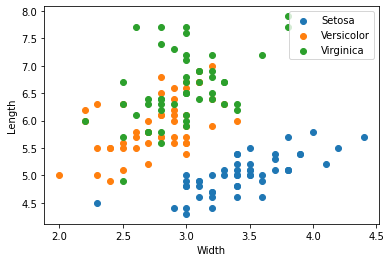

In [ ]:
for v in df["variety"].unique():
  cond = df["variety"] == v
  plt.scatter(df[cond]["sepal.width"], df[cond]["sepal.length"], label=v)
  plt.legend()
  plt.xlabel("Width")
  plt.ylabel("Length")
  plt.show

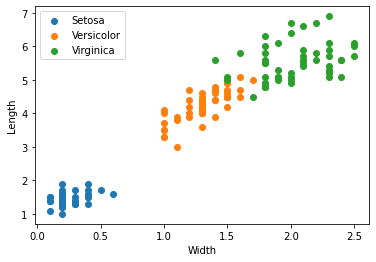

In [ ]:
for v in df["variety"].unique():
  cond = df["variety"] == v
  plt.scatter(df[cond]["petal.width"], df[cond]["petal.length"], label=v)
  plt.legend()
  plt.xlabel("Width")
  plt.ylabel("Length")
  plt.show

**Task 2**

Using test/train split with 20% of the data set aside for testing (see Day 16), apply K Nearest Neighbors to the iris dataset, trying all k values in a sequental range from k=5 to k=15.

Produce a plot showing the accuracy score verses K value.

Report a K value that produces the highest accuracy score within that range.

In [ ]:
Xs = df.drop(columns=["variety"])
Ys = df["variety"]

x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.2)

for k in range(5, 15):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  print(k, metrics.accuracy_score(y_test, y_pred))

5 0.8666666666666667
6 0.8666666666666667
7 0.9
8 0.8666666666666667
9 0.9333333333333333
10 0.9333333333333333
11 0.9333333333333333
12 0.9333333333333333
13 0.9333333333333333
14 0.9333333333333333


**Task B**

In [ ]:
obj = sklearn.datasets.load_breast_cancer()
df = pd.concat([pd.DataFrame(obj["data"],columns=obj["feature_names"]),
    pd.DataFrame(obj["target"], columns=["malignant"])], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


**Task 3**

Create two scatter plots (similar to what you did in Task 1). Each one must have a labeled legend showing the two group ("malignant" vs "benign"):

mean radius vs mean texture
mean smoothness vs mean compactness

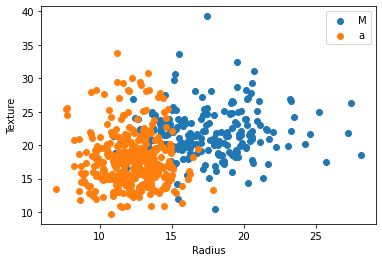

In [ ]:
 for m in df["malignant"].unique():
  cond = df["malignant"] == m
  plt.scatter(df[cond]["mean radius"], df[cond]["mean texture"], label=m)
  plt.legend("Malignant vs Benign")
  plt.xlabel("Radius")
  plt.ylabel("Texture")
  plt.show

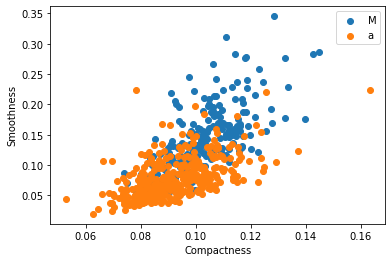

In [ ]:
 for m in df["malignant"].unique():
  cond = df["malignant"] == m
  plt.scatter(df[cond]["mean smoothness"], df[cond]["mean compactness"], label=m)
  plt.legend("Malignant vs Benign")
  plt.xlabel("Compactness")
  plt.ylabel("Smoothness")
  plt.show

**Task 4**

Using test/train split with 20% of the data set aside for testing, create a KNN model with k=13 (i.e. 13 nearest neighbors).

Determine and report the accuracy of that model when applied to the testing set.



In [ ]:
Xs = df.drop(columns=["malignant"])
Ys = df["malignant"]

x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.2)


knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8947368421052632


**Task 5**

[**Note: This depends on material we will cover in Day 18.]

Using 10-fold cross-validation, evaluate all odd K values from 1 to 49.

Plot the average error rate for each K value.

Which K value appears to be optimal?



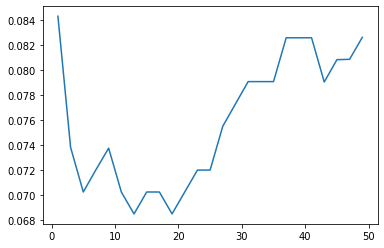

In [ ]:
cv_scores = []
for neighbors in range(1, 50, 2):
  knn = KNeighborsClassifier(n_neighbors=neighbors)
  scores = cross_val_score(knn, Xs, Ys, cv=10)
  cv_scores.append(scores.mean())

errors = [1 - x for x in cv_scores]

plt.plot(range(1, 50, 2), errors)
plt.show()

**Task 6**

[**Note: SOME of what follows depends on material we will cover in Day 18. The first part(s) are only based on Day 17 material.]

Load a data set from this file:

Mall_customers.csv (Links to an external site.)

This contains data from 200 mall visitors. There are no dependent variables or labels -- our task is to determine what "natural" clusters the customers fall into.

As a first step, produce a scatter plot of the two variables "annual income" vs "spending score".

Note: This will be easier if you rename some of the columns when you read in the csv file. To do that, add these options inside the read_csv() command:
header=0, names=[your replacement column names]

In [ ]:
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


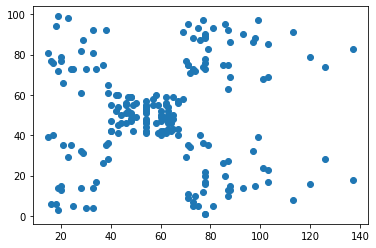

In [ ]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.show()

**Task 7**

Use K Means to determine clusters for these data, based on only the two variables in Task 6 (income and spending score).

Create K Means models for values of K from 1 to 11.

Plot the within-cluster sum-of-squares (WCSS) value for each K value. Use the elbow method to decide the best K value. Does this match your visual intuition from the scatter plot in Task 6?

Using the K value you determine, plot the same scatter plot as in Task 6, but this time add colors for each cluster.

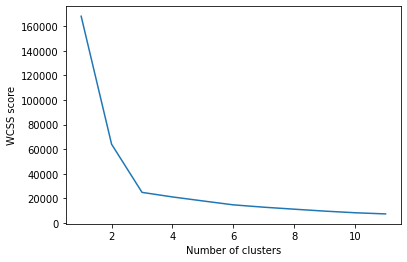

In [ ]:
wcss = []

for k in range(1, 12):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss)
plt.title("WCSS Value for K's")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS score")
plt.show()

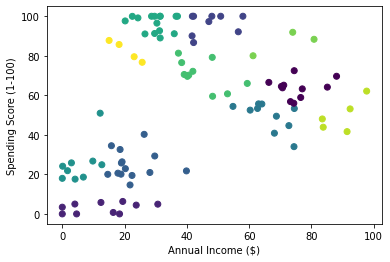

In [ ]:
kmeans = KMeans(n_clusters = k)
kmeans.fit(df)
labels = kmeans.predict(df)
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=labels)
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
plt.show()

